### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

In [6]:
import pandas as pd
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2008.csv')

In [3]:
(df['UniqueCarrier'].value_counts()).nlargest(10)

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: UniqueCarrier, dtype: int64

**Задание 2:** Построить распределение причин отмены рейсов

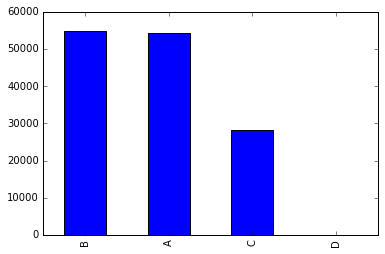

In [4]:
df['CancellationCode'].value_counts().plot(kind='bar')

**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

In [6]:
df.groupby(by=['Origin', 'Dest']).size().sort_values(ascending = False).iloc[0:1]

Origin  Dest
SFO     LAX     13788
dtype: int64

In [295]:
df3 = df[(df['Origin']=='SFO')&(df['Dest']=='LAX')]
df3.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Year,"13,788",NaN,NaN,NaN,NaN,NaN,"2,008",0,"2,008","2,008","2,008","2,008","2,008"
Month,"13,788",NaN,NaN,NaN,NaN,NaN,6,3,1,3,6,9,12
DayofMonth,"13,788",NaN,NaN,NaN,NaN,NaN,16,9,1,8,16,23,31
DayOfWeek,"13,788",NaN,NaN,NaN,NaN,NaN,4,2,1,2,4,5,7
DepTime,"13,299",NaN,NaN,NaN,NaN,NaN,"1,371",489,3,941,"1,355","1,809","2,400"
CRSDepTime,"13,788",NaN,NaN,NaN,NaN,NaN,"1,357",473,540,945,"1,315","1,756","2,240"
ArrTime,"13,286",NaN,NaN,NaN,NaN,NaN,"1,481",502,1,"1,054","1,507","1,919","2,400"
CRSArrTime,"13,788",NaN,NaN,NaN,NaN,NaN,"1,494",473,5,"1,110","1,443","1,920","2,359"
UniqueCarrier,13788,6,UA,5845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FlightNum,"13,788",NaN,NaN,NaN,NaN,NaN,"1,863","1,999",4,817,"1,153","1,957","7,815"


**Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

In [346]:
ddf1 = df.groupby('FlightNum')['CarrierDelay']\
  .sum().sort_values(ascending=False)\
  .iloc[0:5]
ddf1

FlightNum
73    22,176
12    22,097
36    20,300
21    19,367
283   19,328
Name: CarrierDelay, dtype: float64

In [347]:
for i in ddf1.index:
        print(i, df[df['FlightNum'] == i]['UniqueCarrier'].value_counts(), sep='\n')

73
AS    800
UA    704
US    635
B6    417
FL    399
DL    364
CO    336
AA    281
WN    244
XE     90
AQ     60
Name: UniqueCarrier, dtype: int64
12
WN    1714
US     727
B6     523
HA     366
CO     366
AS     366
DL     331
XE     229
FL      92
UA      79
Name: UniqueCarrier, dtype: int64
36
WN    878
UA    578
HA    366
B6    365
DL    365
CO    331
FL    234
AS    119
Name: UniqueCarrier, dtype: int64
21
WN    1108
XE     466
FL     454
AS     366
HA     365
B6     365
AA     362
UA     187
US      18
Name: UniqueCarrier, dtype: int64
283
AA    726
WN    658
NW    599
F9    366
UA    361
B6    245
US    230
FL    150
AS     67
CO      4
Name: UniqueCarrier, dtype: int64


In [348]:
ddf2 = df.groupby('FlightNum')['NASDelay']\
  .sum().sort_values(ascending=False)\
  .iloc[0:5]
ddf2

FlightNum
378   29,875
524   28,593
7     26,591
16    26,322
75    26,267
Name: NASDelay, dtype: float64

In [349]:
for i in ddf2.index:
        print(i, df[df['FlightNum'] == i]['UniqueCarrier'].value_counts(), sep='\n')

378
AA    604
WN    550
HA    366
CO    366
B6    365
F9    364
AS    311
FL    281
UA    252
NW    242
US     78
Name: UniqueCarrier, dtype: int64
524
US    549
AA    544
WN    418
CO    365
FL    365
UA    363
B6    248
NW    208
AS    159
DL    127
XE     89
HA     60
Name: UniqueCarrier, dtype: int64
7
WN    884
US    721
HA    366
AA    366
B6    366
AS    365
CO    325
FL    132
UA    126
DL     56
Name: UniqueCarrier, dtype: int64
16
WN    1162
US     851
B6     423
HA     366
CO     366
AS     366
AA     352
DL     295
XE     239
FL     180
UA     117
Name: UniqueCarrier, dtype: int64
75
US    723
UA    712
WN    495
AS    366
B6    364
AA    362
FL    360
DL    354
Name: UniqueCarrier, dtype: int64


In [350]:
ddf3=df.groupby('FlightNum')['WeatherDelay']\
  .sum().sort_values(ascending=False)\
  .iloc[0:5]
ddf3

FlightNum
539    11,177
5685    6,132
5257    5,987
648     5,242
653     4,862
Name: WeatherDelay, dtype: float64

In [351]:
for i in ddf3.index:
        print(i, df[df['FlightNum'] == i]['UniqueCarrier'].value_counts(), sep='\n')

539
WN    742
AA    429
F9    416
NW    409
CO    366
UA    311
FL    247
AS    241
DL     98
Name: UniqueCarrier, dtype: int64
5685
OH    327
9E    186
EV      5
Name: UniqueCarrier, dtype: int64
5257
OH    285
EV     72
Name: UniqueCarrier, dtype: int64
648
NW    628
UA    514
WN    489
US    374
AA    366
B6    366
DL    283
AS    249
CO    226
FL    184
Name: UniqueCarrier, dtype: int64
653
NW    429
F9    349
UA    289
WN    284
AA    268
AS    233
DL    160
FL     69
US     63
Name: UniqueCarrier, dtype: int64


In [352]:
ddf4= df.groupby('FlightNum')['SecurityDelay']\
  .sum().sort_values(ascending=False)\
  .iloc[0:5]
ddf4

FlightNum
52     780
1256   597
2877   489
467    440
167    438
Name: SecurityDelay, dtype: float64

In [353]:
for i in ddf4.index:
        print(i, df[df['FlightNum'] == i]['UniqueCarrier'].value_counts(), sep='\n')

52
WN    811
UA    726
B6    618
AS    494
US    380
CO    363
FL    272
DL    205
Name: UniqueCarrier, dtype: int64
1256
WN    670
AA    612
US    435
B6    327
DL    212
NW    185
XE     53
UA     16
Name: UniqueCarrier, dtype: int64
2877
WN    753
YV    388
XE    319
9E    219
OO     31
Name: UniqueCarrier, dtype: int64
467
WN    977
UA    582
CO    365
B6    356
NW    349
AS    341
FL    156
AA    146
DL    119
AQ     59
US      8
Name: UniqueCarrier, dtype: int64
167
F9    379
HA    366
UA    354
WN    331
FL    264
CO    227
DL    209
AS     78
B6     31
Name: UniqueCarrier, dtype: int64


In [354]:
ddf5 = df.groupby('FlightNum')['LateAircraftDelay']\
  .sum().sort_values(ascending=False)\
  .iloc[0:5]
ddf5

FlightNum
52    38,157
29    34,109
527   34,042
547   33,443
50    33,431
Name: LateAircraftDelay, dtype: float64

In [355]:
for i in ddf5.index:
        print(i, df[df['FlightNum'] == i]['UniqueCarrier'].value_counts(), sep='\n')

52
WN    811
UA    726
B6    618
AS    494
US    380
CO    363
FL    272
DL    205
Name: UniqueCarrier, dtype: int64
29
WN    1334
US     754
FL     401
HA     366
AS     361
UA     327
B6     303
Name: UniqueCarrier, dtype: int64
527
UA    585
WN    500
CO    392
NW    328
FL    323
B6    320
AS    219
AA    157
DL    148
XE     77
US     34
Name: UniqueCarrier, dtype: int64
547
NW    414
FL    366
B6    365
CO    365
AS    364
WN    296
AA    272
UA    254
DL     92
Name: UniqueCarrier, dtype: int64
50
WN    1229
CO     366
DL     355
US     345
B6     304
FL     284
XE     238
UA     183
Name: UniqueCarrier, dtype: int64


**Задание 5:** Определить, как распределено количество рейсов от времени дня?

count   6,873,482
mean        1,334
std           478
min             1
25%           928
50%         1,325
75%         1,728
max         2,400
Name: DepTime, dtype: float64
Axes(0.125,0.125;0.775x0.775)


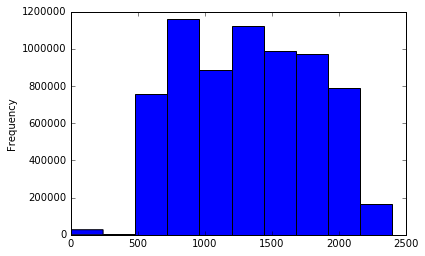

In [357]:
print(df['DepTime'].describe() , df['DepTime'].plot(kind='hist'), sep='\n')

count   7,009,728
mean        1,326
std           464
min             0
25%           925
50%         1,320
75%         1,715
max         2,359
Name: CRSDepTime, dtype: float64
Axes(0.125,0.125;0.775x0.775)


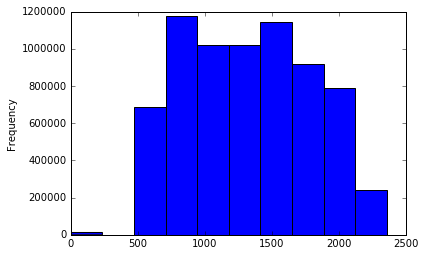

In [358]:
print(df['CRSDepTime'].describe(), df['CRSDepTime'].plot(kind='hist'), sep='\n')

**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

In [273]:
df['Date'] = pd.to_datetime(df.Year*10000 + 
                                    df.Month*100 + 
                                    df.DayofMonth, 
                            format='%Y%m%d')

In [274]:
num_flights_by_date = df.groupby('Date')['FlightNum'].agg('count')

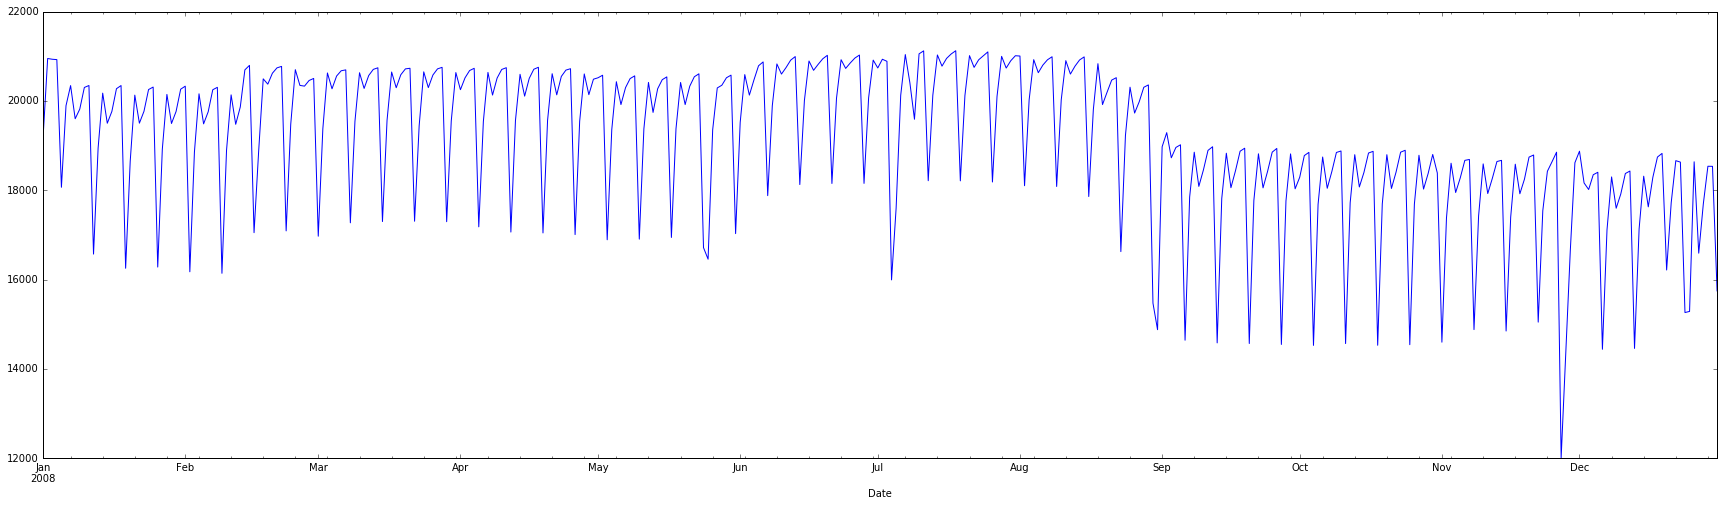

In [276]:
num_flights_by_date.plot(figsize=(30, 8))

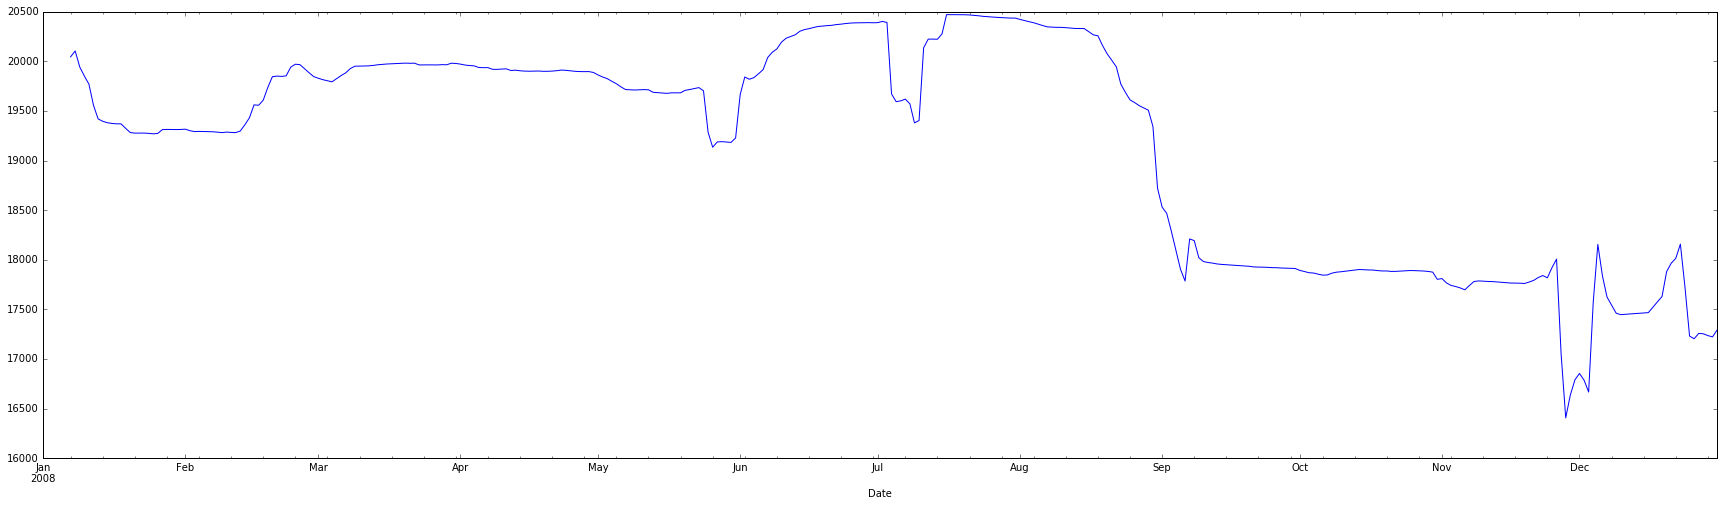

In [278]:
pd.rolling_mean(num_flights_by_date, 7).plot(figsize=(30, 8)) #нужно ли это делать???

### 2. Продолжаем изучать Pandas

Ввиду ограниченности времени, мы не успеваем рассмотреть всё на семинарах. Поэтому часть работы ложится на вас..

Загрузите две csv таблицы [отсюда](https://github.com/emorisse/FBI-Hate-Crime-Statistics) и импортируйте через Pandas. В них содержатся агрегированные данные по различным организациям\городам США, содержащие количество обращений по тем или иным случаям нарушения закона. В одной таблице (table13.csv) перечислены управления, которые сообщали об этих случаях, в другой - которые не сообщали.

**Задание 1:** Изучите документации для методов `unique_values`, `isin`. С помощью этой функции, определите, содержатся ли в двух таблицах одни и те же штаты.

In [106]:
dfr1 = pd.read_csv('table13.csv')
dfr2 = pd.read_csv('table14.csv')

In [107]:
d1=dfr1['State'].unique()
d2=dfr2['State'].unique()
amount=(len(d1)-len(d2))
j=0
a=[]
a1=[]

if abs(amount)>=0:
    for i in range(len(d1)):
        c= dfr2['State'].isin(d1[i:(i+1)])
        b = c.unique()
        if True in b:
            a1.append(d1[i])
            j=j+1
        else:
            a.append(d1[i])
else:
    for i in range(len(d2)):
        c= dfr1['State'].isin(d2[i:(i+1)])
        b = c.unique()
        if True in b:
            a1.append(d2[i])
            j=j+1
        else:
            a.append(d2[i])
print('В обеих таблицах содержатся штаты:')
print(*a1, sep=', ')
print('Штаты, не совпадающие в таблицах:')
print(*a, sep=', ' )

В обеих таблицах содержатся штаты:
Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, Florida, Georgia, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, New_Hampshire, New_Jersey, New_Mexico, New_York, North_Carolina, North_Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode_Island, South_Carolina, South_Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West_Virginia, Wisconsin, Wyoming
Штаты, не совпадающие в таблицах:
DC, Nevada


**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

In [108]:
d = [dfr1, dfr2]
table = pd.concat(d)
table


,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,0,1,0,1,NaN,NaN,Florence,Cities,0,0,...,0,"39,481",NaN,NaN,NaN,NaN,2,0,0,Alabama
1,0,1,0,0,NaN,NaN,Hoover,Cities,0,0,...,0,"84,139",NaN,NaN,NaN,NaN,0,0,1,Alabama
2,1,0,1,0,NaN,NaN,Prattville,Cities,0,0,...,0,"35,154",NaN,NaN,NaN,NaN,2,0,0,Alabama
3,0,0,1,0,NaN,NaN,Tuscaloosa,Cities,0,0,...,0,"94,126",NaN,NaN,NaN,NaN,1,0,0,Alabama
4,2,3,3,0,NaN,NaN,Anchorage,Cities,0,0,...,0,"299,455",NaN,NaN,NaN,NaN,8,0,0,Alaska
5,1,0,0,NaN,NaN,NaN,Apache Junction,Cities,0,0,...,0,"36,626",NaN,NaN,NaN,NaN,1,0,0,Arizona
6,1,1,3,0,NaN,NaN,Avondale,Cities,0,1,...,0,"78,905",NaN,NaN,NaN,NaN,4,0,0,Arizona
7,0,1,0,0,NaN,NaN,Eagar,Cities,0,1,...,0,"5,034",NaN,NaN,NaN,NaN,0,0,0,Arizona
8,0,0,1,0,NaN,NaN,El Mirage,Cities,0,0,...,0,"32,837",NaN,NaN,NaN,NaN,1,0,0,Arizona
9,1,0,0,0,NaN,NaN,Gilbert,Cities,0,0,...,0,"225,232",NaN,NaN,NaN,NaN,1,0,0,Arizona


**Задание 3:** Изучите документации для методов `drop_dublicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

In [109]:
table.dropna(how ='any')


,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State


In [110]:
dfr1.rename(columns={'Agency type':'Agency Type', 'Agency name':'Agency Name', '1st quarter':'Q1', '2nd quarter':'Q2','3rd quarter':'Q3','4th quarter':'Q4'}, inplace=True)
d1 = [dfr1, dfr2]
table1 = pd.concat(d1)
table1

,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0,Alabama
1,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1,Alabama
2,Prattville,Cities,0,0,0,0,"35,154",1,0,1,0,2,0,0,Alabama
3,Tuscaloosa,Cities,0,0,0,0,"94,126",0,0,1,0,1,0,0,Alabama
4,Anchorage,Cities,0,0,0,0,"299,455",2,3,3,0,8,0,0,Alaska
5,Apache Junction,Cities,0,0,0,0,"36,626",1,0,0,NaN,1,0,0,Arizona
6,Avondale,Cities,0,1,0,0,"78,905",1,1,3,0,4,0,0,Arizona
7,Eagar,Cities,0,1,0,0,"5,034",0,1,0,0,0,0,0,Arizona
8,El Mirage,Cities,0,0,0,0,"32,837",0,0,1,0,1,0,0,Arizona
9,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,0,1,0,0,Arizona


In [111]:
table1.dropna(how ='any')


,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0,Alabama
1,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1,Alabama
2,Prattville,Cities,0,0,0,0,"35,154",1,0,1,0,2,0,0,Alabama
3,Tuscaloosa,Cities,0,0,0,0,"94,126",0,0,1,0,1,0,0,Alabama
4,Anchorage,Cities,0,0,0,0,"299,455",2,3,3,0,8,0,0,Alaska
6,Avondale,Cities,0,1,0,0,"78,905",1,1,3,0,4,0,0,Arizona
7,Eagar,Cities,0,1,0,0,"5,034",0,1,0,0,0,0,0,Arizona
8,El Mirage,Cities,0,0,0,0,"32,837",0,0,1,0,1,0,0,Arizona
9,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,0,1,0,0,Arizona
10,Glendale,Cities,0,1,0,0,"234,006",2,0,3,2,2,3,1,Arizona


**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

In [112]:
table1.set_index(['State','Agency Type'])

Agency Name  \
State    Agency Type                                                              
Alabama  Cities                                                        Florence   
         Cities                                                          Hoover   
         Cities                                                      Prattville   
         Cities                                                      Tuscaloosa   
Alaska   Cities                                                       Anchorage   
Arizona  Cities                                                 Apache Junction   
         Cities                                                        Avondale   
         Cities                                                           Eagar   
         Cities                                                       El Mirage   
         Cities                                                         Gilbert   
         Cities                                                        Glendale   
         Cities                                                        Goodyear   
         Cities                                                        Maricopa   
         Cities                                                            Mesa   
         Cities                                                         Phoenix   
         Cities                                                        Prescott   
         Cities                                                      Scottsdale   
         Cities                                                           Tempe   
         Cities                                                          Tucson   
         Cities                                                            Yuma   
         Universities and Colleges                  Northern Arizona University   
         Universities and Colleges                        University of Arizona   
         Metropolitan Counties                                          Cochise   
         Metropolitan Counties                                         Maricopa   
         Metropolitan Counties                                             Pima   
         Metropolitan Counties                                             Yuma   
Arkansas Cities                                                     Bentonville   
         Cities                                                      Berryville   
         Cities                                                           Cabot   
         Cities                                                         England   
...                                                                         ...   
Wyoming  Cities                                                        Sundance   
         Cities                                                     Thermopolis   
         Cities                                                      Torrington   
         Cities                                                       Wheatland   
         Cities                                                         Worland   
         Universites and Colleges   Northern Wyoming Community College District   
         Universites and Colleges                         University of Wyoming   
         Metropolitan Counties                                          Laramie   
         Metropolitan Counties                                          Natrona   
         Nonmetropolitan Counties                                        Albany   
         Nonmetropolitan Counties                                      Big Horn   
         Nonmetropolitan Counties                                      Campbell   
         Nonmetropolitan Counties                                        Carbon   
         Nonmetropolitan Counties                                      Converse   
         Nonmetropolitan Counties                                         Crook   
         Nonmetropolitan Counties                                       Fremont   
 

**Задание 5:** В Pandas можно идерировать по DataFrame! Ищучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состаящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

In [113]:
t = table1['State'].values

In [114]:
stat = np.random.choice(t, size=3)

In [130]:
t1 = table1[table1['State'] == stat[0]]
t2 = table1[table1['State'] == stat[1]]
t3 = table1[table1['State'] == stat[2]]
s = pd.concat([t1, t2, t3])


In [134]:
p = s['Population'].str.replace(',', '')
p = p.astype(float)

In [135]:
sts = pd.concat([s, p], axis=(1))
sts1 = sts.groupby(['State','Agency Type']).sum()
sts1

Disability  Ethnicity  Gender Identity  \
State    Agency Type                                                         
Nebraska Cities                              0          5                0   
         Metropolitan Counties               0          1                0   
         Metropolitian Counties            NaN        NaN              NaN   
         Nonmetropolitan Counties            0          0                0   
         State Police Agencies             NaN        NaN              NaN   
         Universities and Colleges         NaN        NaN              NaN   
Utah     Cities                              1          5                0   
         Metropolitan Counties               1          0                0   
         Nonmetropolitan Counties            0          0                0   
         Other Agencies                      0          0                0   
         State Police Agencies               0          3                0   
         Universities and Colleges           0          0                0   
Virginia Cities                              0          2                0   
         Metropolitan Counties               0          3                0   
         Nonmetropolitan Counties            0          0                0   
         Other Agencies                    NaN        NaN              NaN   
         State Police Agencies               0          0                0   
         Universities and Colleges           0          2                0   

                                    Q1  Q2  Q3  Q4  Race  Religion  \
State    Agency Type                                                 
Nebraska Cities                      9   6   9   8    14         5   
         Metropolitan Counties       0   1   0   0     0         0   
         Metropolitian Counties      0   0   0   0   NaN       NaN   
         Nonmetropolitan Counties    0   0   1   2     3         0   
         State Police Agencies       0   0   0   0   NaN       NaN   
         Universities and Colleges   0   0   0   0   NaN       NaN   
Utah     Cities                      8  18  12   7    27         8   
         Metropolitan Counties       3   5   0   2     6         1   
         Nonmetropolitan Counties    1   2   4   0     6         1   
         Other Agencies              0   1   2   0     3         0   
         State Police Agencies       2   1   2   1     2         0   
         Universities and Colleges   1   0   0   3     3         0   
Virginia Cities                      9  17  14  11    30        10   
         Metropolitan Counties      15  12  14  11    31        16   
         Nonmetropolitan Counties    2   0   2   3     6         1   
         Other Agencies              0   0   0   0   NaN       NaN   
         State Police Agencies       1   0   0   0     0         0   
         Universities and Colleges   3   1   3   1     3         3   

                                    Sexual orientation  Population  
State    Agency Type                                                
Nebraska Cities                                      8     1168658  
         Metropolitan Counties                       0         NaN  
         Metropolitian Counties                    NaN         NaN  
         Nonmetropolitan Counties                    0         NaN  
         State Police Agencies                     NaN         NaN  
         Universities and Colleges                 NaN        7199  
Utah     Cities                                      4     2134343  
         Metropolitan Counties                       2         NaN  
         Nonmetropolitan Counties                    0         NaN  
         Other Agencies                              0         NaN  
         State Police Agencies                       1         NaN  
         Universities and Colleges                   1      166573  
Virginia Cities                                      9     2999855  
         Metropolitan Counties         

In [152]:

for row in sts1.iterrows():
    r = row[1]['Population']
    ca = row[0]
    print(ca, r)
    

('Nebraska', 'Cities') 1168658.0
('Nebraska', 'Metropolitan Counties') nan
('Nebraska', 'Metropolitian Counties') nan
('Nebraska', 'Nonmetropolitan Counties') nan
('Nebraska', 'State Police Agencies') nan
('Nebraska', 'Universities and Colleges') 7199.0
('Utah', 'Cities') 2134343.0
('Utah', 'Metropolitan Counties') nan
('Utah', 'Nonmetropolitan Counties') nan
('Utah', 'Other Agencies') nan
('Utah', 'State Police Agencies') nan
('Utah', 'Universities and Colleges') 166573.0
('Virginia', 'Cities') 2999855.0
('Virginia', 'Metropolitan Counties') nan
('Virginia', 'Nonmetropolitan Counties') nan
('Virginia', 'Other Agencies') nan
('Virginia', 'State Police Agencies') nan
('Virginia', 'Universities and Colleges') 319819.0


## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [7]:
DF = pd.read_csv('accord_sedan_training.csv')

In [63]:
X = np.zeros([len(DF.values), 2])
for i in range(len(DF.values)):
    X[i][0] = 1
    X[i][1] = DF.values[i][1]


In [39]:
Y = DF['price'].values
Y1 = Y.astype(float)

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

In [11]:
from scipy.spatial import distance
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 8.0)
%matplotlib inline 
from mpl_toolkits import mplot3d
import scipy.optimize as opt
import sympy

In [40]:
n = len(Y)
c = 100
b0 = np.linspace(-5, 5, c)
b1 = np.linspace(-5, 5, c)
B0, B1 = np.meshgrid(b0,b1)

L = np.zeros(shape=(c, c))
for i in range(c):
    for j in range(c):
        for k in range(n):
            L[i][j] = (np.sum((B0[i][j] + B1[i][j] * X[k][1] - Y[k])**2))/ (2*n)
        

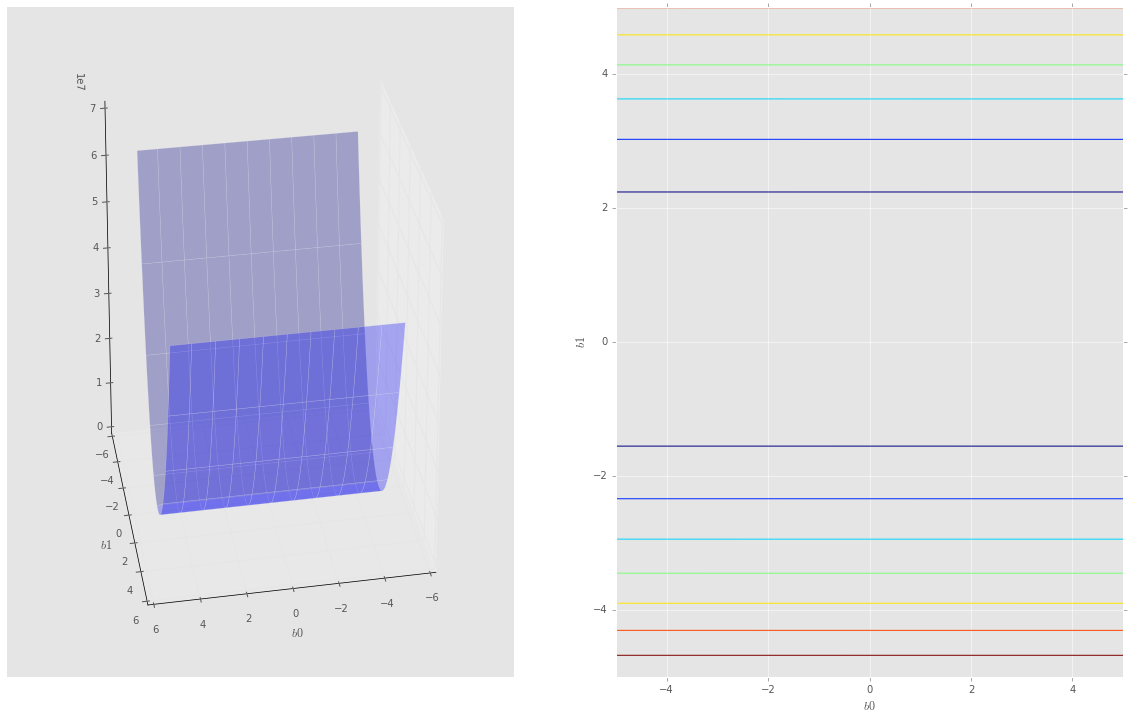

In [41]:
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(1, 2, 1, projection='3d') 
ax.view_init(25,80)
ax.plot_surface(B0, B1, L, alpha=0.3,)
ax.set_xlabel('$b0$')
ax.set_ylabel('$b1$')

ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(B0, B1, L)
plt.clabel(contour, inline=15, fontsize=100)
ax.set_xlabel('$b0$')
ax.set_ylabel('$b1$')

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.


In [214]:
def gradientDescent(X, Y1, beta, alpha, m, numIterations):
    XTrans = X.T
    for i in range(0, numIterations):
        hypothesis = np.dot(X, beta)
        loss = hypothesis - Y1
        cost = np.sum(loss**2) / (2*m)
         
        gradient = (np.dot(XTrans, loss))/m
        
        beta = beta - alpha * gradient
                            
    return beta

precision = 0.001
m, n = np.shape(X)
numIterations = 25
alpha = 0.001
beta = np.ones(n)
beta = gradientDescent(X, Y1, beta, alpha, m, numIterations)
print(beta)

[ -3.43385873e+163  -2.55050194e+168]


**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

In [211]:
def gradientDescent(X, Y1, beta, alpha, m, numIterations):
    XTrans = X.T
    for i in range(0, numIterations):
        hypothesis = np.dot(X, beta)
        loss = hypothesis - Y1
        cost = np.sum(loss**2) / (2*m)
         
        gradient = (np.dot(XTrans, loss))/m
        
        beta = beta - alpha * gradient
        print(beta)                    
    return beta

m, n = np.shape(X)
numIterations = 25
alpha = 0.001
beta = np.ones(n)
beta = gradientDescent(X, Y1, beta, alpha, m, numIterations)
print(beta)

[ -5.99230000e+01  -4.53593661e+06]
[  3.35278243e+08   2.49028243e+13]
[ -1.84071682e+15  -1.36719422e+20]
[  1.01057510e+22   7.50605645e+26]
[ -5.54817567e+28  -4.12091292e+33]
[  3.04601344e+35   2.26242946e+40]
[ -1.67229706e+42  -1.24210028e+47]
[  9.18110675e+48   6.81927603e+53]
[ -5.04053515e+55  -3.74386242e+60]
[  2.76731285e+62   2.05542433e+67]
[ -1.51928717e+69  -1.12845203e+74]
[  8.34106453e+75   6.19533385e+80]
[ -4.57934213e+82  -3.40131086e+87]
[  2.51411247e+89   1.86735950e+94]
[ -1.38027720e+096  -1.02520224e+101]
[  7.57788351e+102   5.62848040e+107]
[ -4.16034682e+109  -3.09010167e+114]
[  2.28407914e+116   1.69650202e+121]
[ -1.25398620e+123  -9.31399480e+127]
[  6.88453115e+129   5.11349225e+134]
[ -3.77968825e+136  -2.80736715e+141]
[  2.07509312e+143   1.54127745e+148]
[ -1.13925043e+150  -8.46179375e+154]
[  6.25461833e+156   4.64562389e+161]
[ -3.43385873e+163  -2.55050194e+168]
[ -3.43385873e+163  -2.55050194e+168]


In [212]:
b0, b1 =beta[-1]
y = x(b1) +b0
x = DF['mileage'].values
plt.plot(x, Y, "o")
plt.plot(x, y)

#исправить код, для градиентного спуска, переделать результат в список, доделать последний пункт

TypeError: 'numpy.float64' object is not iterable